<h1><center>EDA for Car Sales Data Done in USA (1990-2017)</center></h1>

## 1. Loading The Dependencies

In [262]:
import numpy as np                     
import pandas as pd                    
import pandas_profiling                
import seaborn as sns                  
import matplotlib as mat               # Plotting library for Python programming language
import matplotlib.pyplot as plt
import bokeh                           # interactive visualization library for Python
import sys                             
import os
%matplotlib inline

## 2. Data Loading and Description

__Context__
- This dataset was collected from Kaggle "Car Features and MSRP".
- It describes almost 12,000 carmodels, sold in the USA between 1990 and 2017, with the market price (new or used)and some features.

__Content__ <br/>
Dataset contains __11914__ rows and __16__ variables.



### 2.1 Loading Data

In [263]:

cardata = pd.read_csv('C:/Users/RaMaN KuMaR/EDA feature of Car/data.csv',sep=',',encoding='latin-1')
cardata.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 2.2 Rename Columns name.

In [264]:
cardata.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"},inplace=True) # Rename some columns name, to get meaningful information
cardata.shape

(11914, 16)

### 2.3 Removal of Duplicates

In [265]:

cardata.drop_duplicates(keep=False, inplace=True)           # Removing duplicate rows
cardata.shape

(10582, 16)

Duplicate Rows Found:__1332__
Which are now removed.
__10582__ Rows are now present in the Dataset.

## 3. Data Profiling

- We will first __understand our dataset__ using various pandas functionalities.
- Then we will do __pandas profiling__ to find out which columns of our dataset need preprocessing.
- In preprocessing we will deal with __zero and missing values__ columns.
- again we will do __pandas profiling__ to see how preprocessing have transformed our dataset

In [266]:
cardata.columns   # This will print name of all columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'HP', 'Cylinders',
       'Transmission', 'Drive Mode', 'Number of Doors', 'Market Category',
       'Vehicle Size', 'Vehicle Style', 'MPG-H', 'MPG-C', 'Popularity',
       'Price'],
      dtype='object')

In [267]:
cardata.dtypes    # This will print datatypes of all columns

Make                 object
Model                object
Year                  int64
Engine Fuel Type     object
HP                  float64
Cylinders           float64
Transmission         object
Drive Mode           object
Number of Doors     float64
Market Category      object
Vehicle Size         object
Vehicle Style        object
MPG-H                 int64
MPG-C                 int64
Popularity            int64
Price                 int64
dtype: object

In [268]:

cardata.head()      # This will print top 5 rows of dataset

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [269]:

cardata.info()  # This will show index, data type and memory information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10582 entries, 0 to 11913
Data columns (total 16 columns):
Make                10582 non-null object
Model               10582 non-null object
Year                10582 non-null int64
Engine Fuel Type    10579 non-null object
HP                  10513 non-null float64
Cylinders           10552 non-null float64
Transmission        10582 non-null object
Drive Mode          10582 non-null object
Number of Doors     10576 non-null float64
Market Category     7490 non-null object
Vehicle Size        10582 non-null object
Vehicle Style       10582 non-null object
MPG-H               10582 non-null int64
MPG-C               10582 non-null int64
Popularity          10582 non-null int64
Price               10582 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [270]:
cardata.describe(include='all')   # This will display statistical information of dataset

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
count,10582,10582,10582.000000,10579,10513.000000,10552.000000,10582,10582,10576.000000,7490,10582,10582,10582.000000,10582.000000,10582.000000,1.058200e+04
unique,48,897,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1051,156,NaN,6234,NaN,NaN,7624,3946,NaN,1040,4063,2657,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.942544,NaN,257.051650,5.709155,NaN,NaN,3.467379,NaN,NaN,NaN,26.533737,19.695143,1564.109998,4.309634e+04
std,NaN,NaN,6.968729,NaN,110.982218,1.811368,NaN,NaN,0.866653,NaN,NaN,NaN,9.093646,9.359977,1450.877905,6.289803e+04
min,NaN,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,175.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,15.000000,549.000000,2.199500e+04
50%,NaN,NaN,2015.000000,NaN,240.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,25.000000,18.000000,1385.000000,3.130000e+04
75%,NaN,NaN,2016.000000,NaN,305.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.380000e+04


In [271]:
cardata.isnull().sum()                                # This will print count of NaN values in column

Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
HP                    69
Cylinders             30
Transmission           0
Drive Mode             0
Number of Doors        6
Market Category     3092
Vehicle Size           0
Vehicle Style          0
MPG-H                  0
MPG-C                  0
Popularity             0
Price                  0
dtype: int64

### 3.2 Pre Profiling of Data

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [272]:
preprofile = pandas_profiling.ProfileReport(cardata)
preprofile.to_file(outputfile="Pre_Processed_Data.html")

D:\Anaconda\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __Pre_Processed_Data.html__. We can find useful insight by analyzing this file. <br/>
Now we will process our data to better understand it.

### 3.3 Preprocessing of Data

- Drop column __Model__ As it has nothing to Do with Analysis going to be Performed here.

In [273]:

cardata.drop(['Model'], axis=1, inplace=True)                        # Droping column model
cardata.head(5)

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


- Drop column __Popularity__ And __MarketCategory__ As it has nothing to Do with Analysis going to be Performed here.

In [274]:

cardata.drop(['Popularity'], axis=1, inplace=True)                        # Droping column model
cardata.head(5)

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,34500


In [275]:

cardata.drop(['Market Category'], axis=1, inplace=True)                        # Droping column model
cardata.head(5)

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500


-Checking for Null Values present in the coloumns

In [276]:
cardata['Price'].astype(bool).sum(axis=0)

10582

In [277]:
cardata['Make'].astype(bool).sum(axis=0)

10582

In [278]:
cardata['Year'].astype(bool).sum(axis=0)

10582

In [279]:
cardata['Engine Fuel Type'].astype(bool).sum(axis=0)

10582

In [280]:
cardata['HP'].astype(bool).sum(axis=0)

10582

In [281]:
cardata['Cylinders'].astype(bool).sum(axis=0) #Some values of Cylinders are having NAN

10526

-Replacing Null Values in the __Cylinders__ Field with NaN

In [282]:
cardata['Cylinders'] = cardata['Cylinders'].replace(0,np.nan) 

-Replacing the Nan Values with the __Mean__ Value of Cylinder

In [283]:
cardata['Cylinders'].fillna(cardata.groupby('Make')['Cylinders'].transform('mean'),inplace=True) # This will replace NaN with mean

In [284]:
cardata['Cylinders'].astype(bool).sum(axis=0) #All values of Cylinders are having some Values Now

10582

In [285]:
cardata.isnull().sum()

Make                 0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           18
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Price                0
dtype: int64

- Doing the Same for Other Coloumn Which are conting null Values

In [286]:
# This will replace NaN with mode
cardata['Engine Fuel Type'].fillna(cardata['Engine Fuel Type'].mode()[0], inplace=True)

In [287]:
cardata.isnull().sum()

Make                 0
Year                 0
Engine Fuel Type     0
HP                  69
Cylinders           18
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Price                0
dtype: int64

In [288]:
cardata['HP'].fillna(cardata.groupby('Make')['HP'].transform('mean'),inplace=True)

In [289]:
cardata.isnull().sum()

Make                 0
Year                 0
Engine Fuel Type     0
HP                  18
Cylinders           18
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Price                0
dtype: int64

-Dropping The Rows Which contain __Null__ Values

In [290]:
cardata.drop(cardata[cardata['HP'].isnull()].index, inplace = True) #Will drop the Null value.Here Both the HP field and Cylinder Field will be removed

In [291]:
cardata.isnull().sum()

Make                0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     1
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Price               0
dtype: int64

In [292]:
cardata.drop(cardata[cardata['Number of Doors'].isnull()].index, inplace = True)

In [293]:
cardata.isnull().sum() #Now there are no values having nuLL values

Make                0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Price               0
dtype: int64

### 3.4 Post Profiling of Data

In [294]:
postprofile = pandas_profiling.ProfileReport(cardata)
postprofile.to_file(outputfile="After_Processing.html")

D:\Anaconda\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [295]:

cardata.describe(include='all')

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
count,10563,10563.000000,10563,10563.000000,10563.000000,10563,10563,10563.000000,10563,10563,10563.000000,10563.000000,1.056300e+04
unique,47,NaN,10,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN
freq,1051,NaN,6237,NaN,NaN,7624,3946,NaN,4063,2639,NaN,NaN,NaN
mean,NaN,2010.934962,NaN,256.949303,5.735305,NaN,NaN,3.466723,NaN,NaN,26.411341,19.569156,4.300065e+04
std,NaN,6.972586,NaN,110.689314,1.762321,NaN,NaN,0.866984,NaN,NaN,8.591983,8.846233,6.287842e+04
min,NaN,1990.000000,NaN,55.000000,3.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000e+03
25%,NaN,2007.000000,NaN,175.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,15.000000,2.199500e+04
50%,NaN,2015.000000,NaN,240.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,25.000000,18.000000,3.129000e+04
75%,NaN,2016.000000,NaN,305.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,4.369500e+04


We have processed the data and now the dataset does not contain any missing values. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. 




## 4. Questions

### Q 1. Which brand of cars sold the most ?

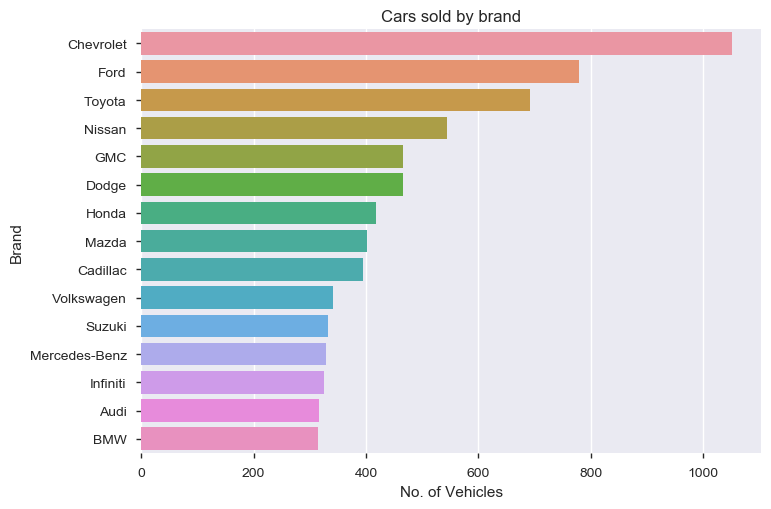

In [296]:
# top brands which cars sold the most
sns.countplot(y = 'Make', data = cardata, order = cardata['Make'].value_counts().nlargest(15).index)
plt.title("Cars sold by brand")
plt.ylabel('Brand')
plt.xlabel('No. of Vehicles');
plt.show()

### Q 2. Which Vehicle Style segment of cars sold the most ?

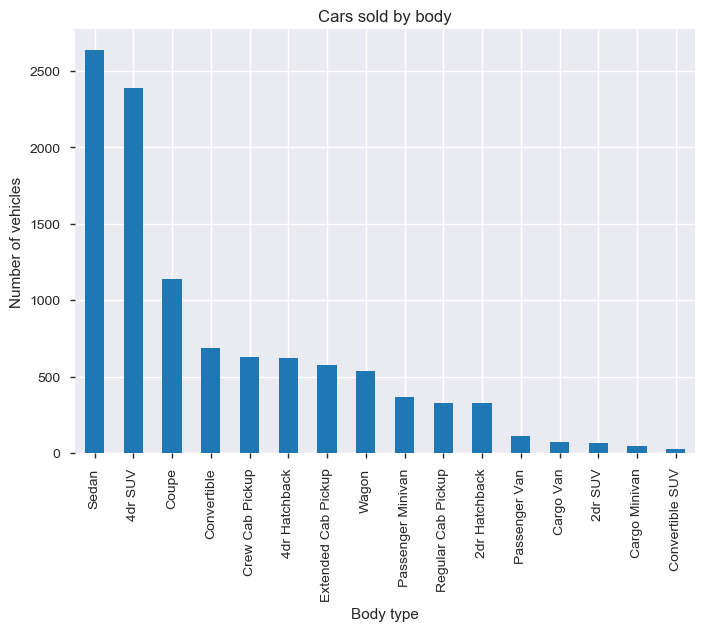

In [297]:

cardata['Vehicle Style'].value_counts().plot.bar()                      # Bar chart for car 'body' variable
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type');


-Here from the chart we can see that __Seden__ cars were the most sold cars followed by __4dr SUV__.

--Through __PERCENTAGE__

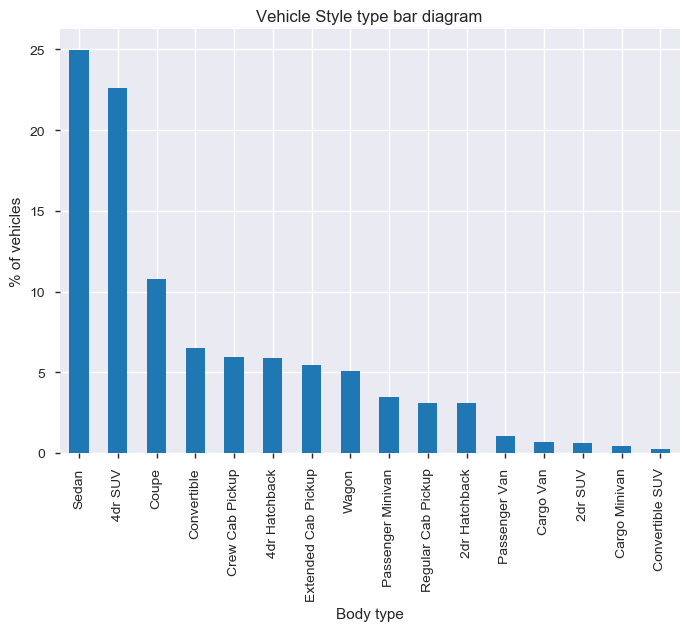

In [298]:
(cardata['Vehicle Style'].value_counts() / len(cardata)*100).plot.bar()                # Bar chart of car 'body in terms of %'
plt.title("Vehicle Style type bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Body type');

--Approximately __25%__ of the total cars in the dataset were __Seden__ which were Sold.

### Q 3. Which drive segment of cars in which body type sold the most ?

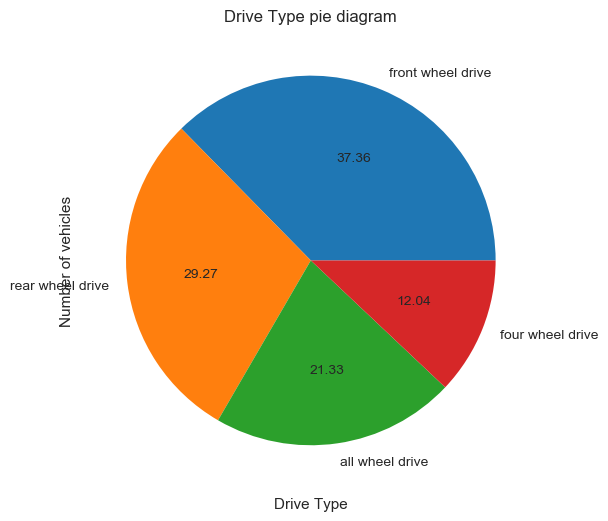

In [299]:
cardata['Drive Mode'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Drive Type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive Type');

-front wheel drive 37.36<br>
-four wheel drive 12.04<br>
-all wheel drive 21.33<br>
-rear wheel drive 29.27



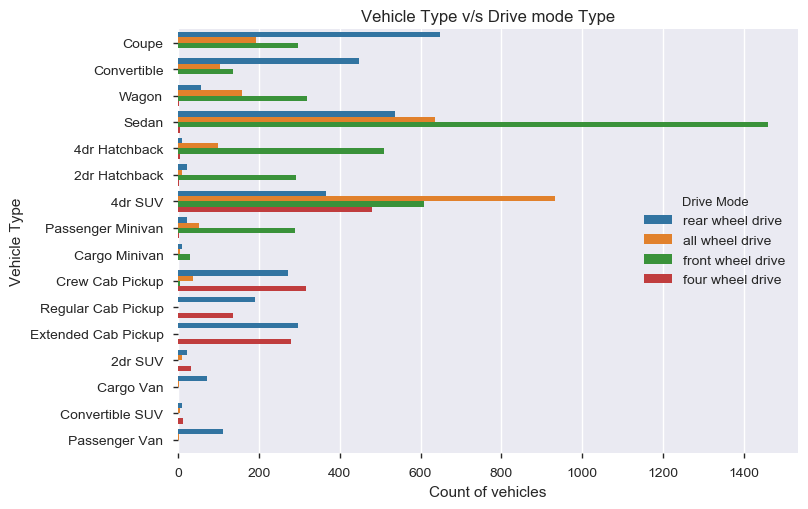

In [300]:
# Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style',data=cardata, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles');

## Making a New group "Price_group"

In [301]:

# Create a new column 'Price_group' and assign the value based on car price
cardata['price_group'] = pd.cut(cardata['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
cardata['price_group'] = cardata['price_group'].astype(object)

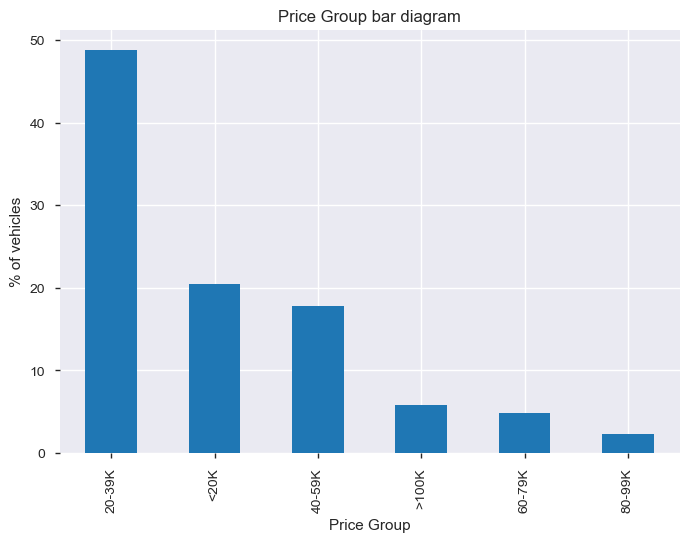

In [302]:
(cardata['price_group'].value_counts() / len(cardata) *100).plot.bar()
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

## Brand Wise Which cars were Sold the Most

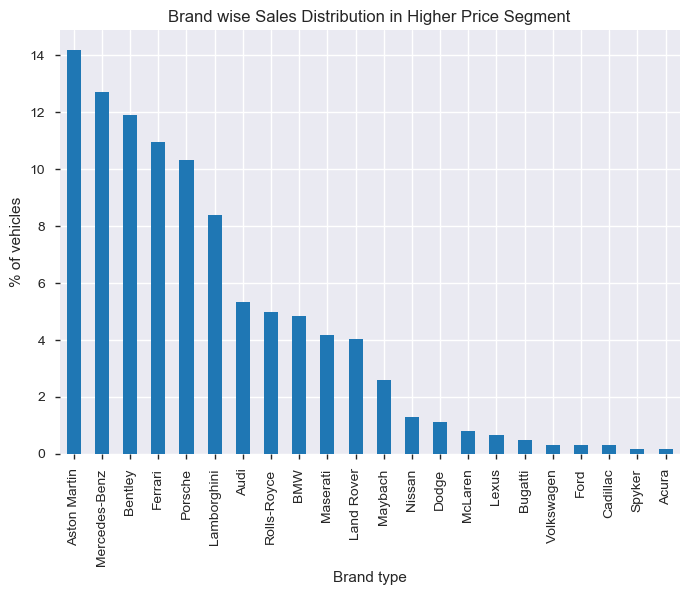

In [303]:

# Brand wise car sale in higher price segment
carprc = cardata.loc[cardata['Price'] >= 100000]
(carprc['Make'].value_counts() / len(carprc)*100).plot.bar()                # Bar chart of car 'body in terms of %'
plt.title("Brand wise Sales Distribution in Higher Price Segment")
plt.ylabel('% of vehicles')
plt.xlabel('Brand type');

--__Aston Martin__ was the most sold Card in the Field of Brand.

## Price vs Vehicle style

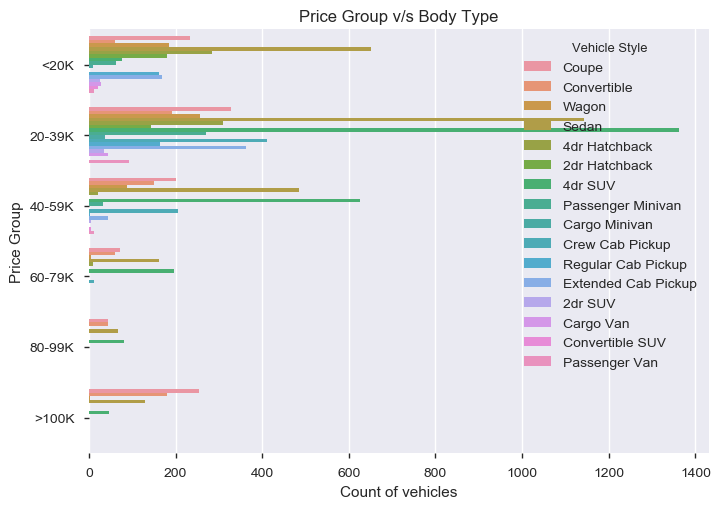

In [304]:
# vehicle style type v/s price group
sns.countplot(y='price_group',data=cardata, hue='Vehicle Style', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])           
plt.title("Price Group v/s Body Type")
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

## Price Group vs Drive Mode

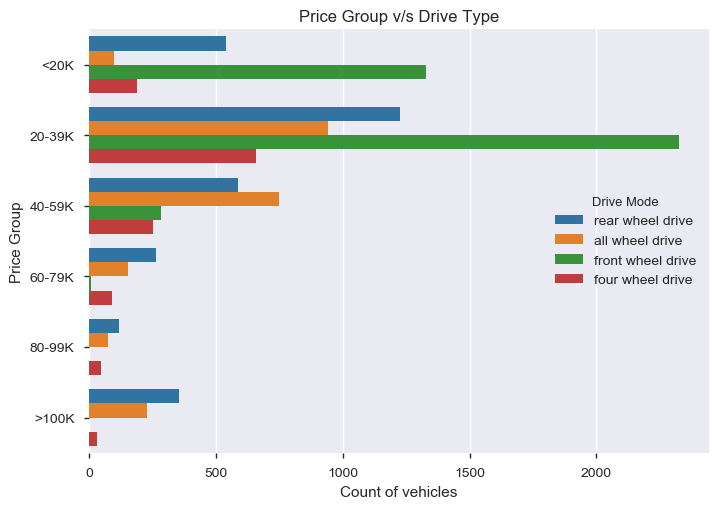

In [305]:
# drive type v/s price group
sns.countplot(y='price_group',data=cardata, hue='Drive Mode', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])
plt.title("Price Group v/s Drive Type")
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

## Price group vs Engine Type

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


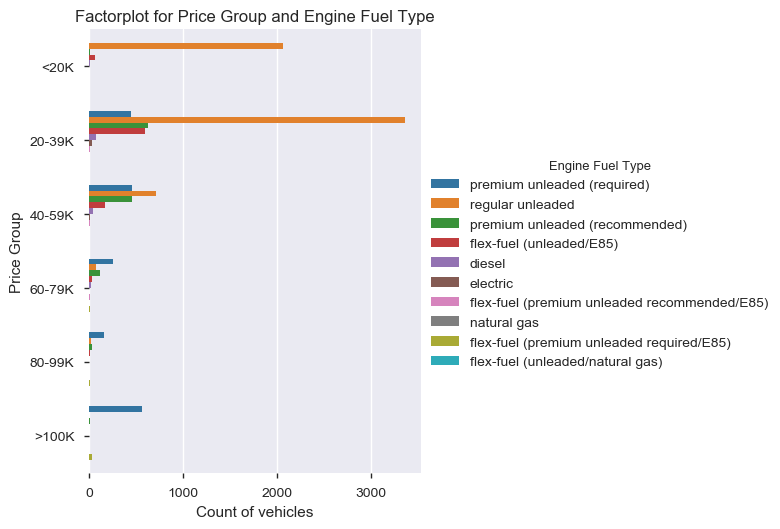

In [306]:
# Price group v/s engType
sns.factorplot(y='price_group', data=cardata, hue='Engine Fuel Type', kind= 'count', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])   
plt.title('Factorplot for Price Group and Engine Fuel Type')
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

### How does price is relate to mileage on Highway?

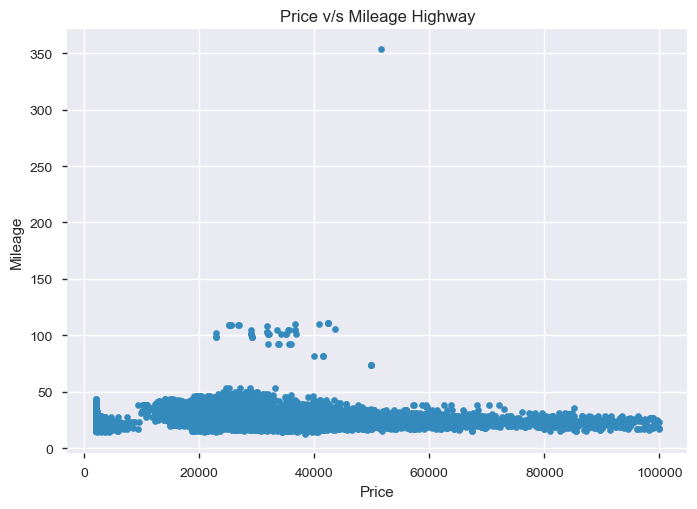

In [307]:
# price v/s mileage on Highway
cardata[cardata['Price'] < 100000 ].plot.scatter(x='Price', y='MPG-H')
plt.title("Price v/s Mileage Highway")
plt.ylabel('Mileage')
plt.xlabel('Price');

-Some middle Range as well as lower range cars are having greater mileage than those of high range cars

### How does price is relate to mileage in city?

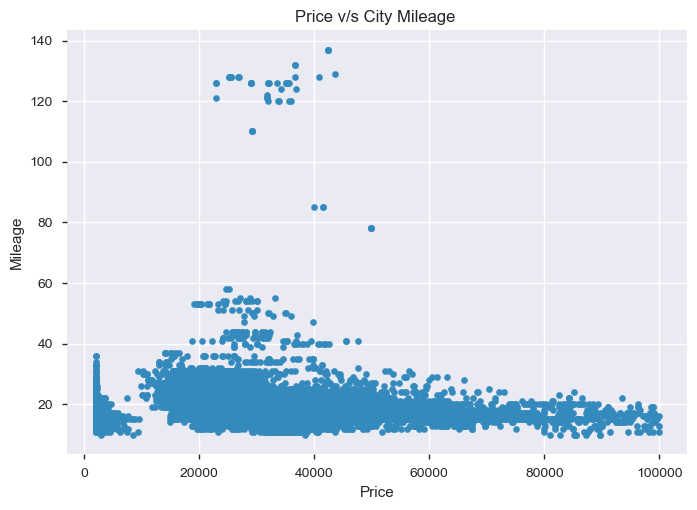

In [308]:
# price v/s mileage 
cardata[cardata['Price'] < 100000 ].plot.scatter(x='Price', y='MPG-C')
plt.title("Price v/s City Mileage ")
plt.ylabel('Mileage')
plt.xlabel('Price');

- Lower Price Segment have greater mileage Than those of higher price segment.

###  Correlation between various features of car data.

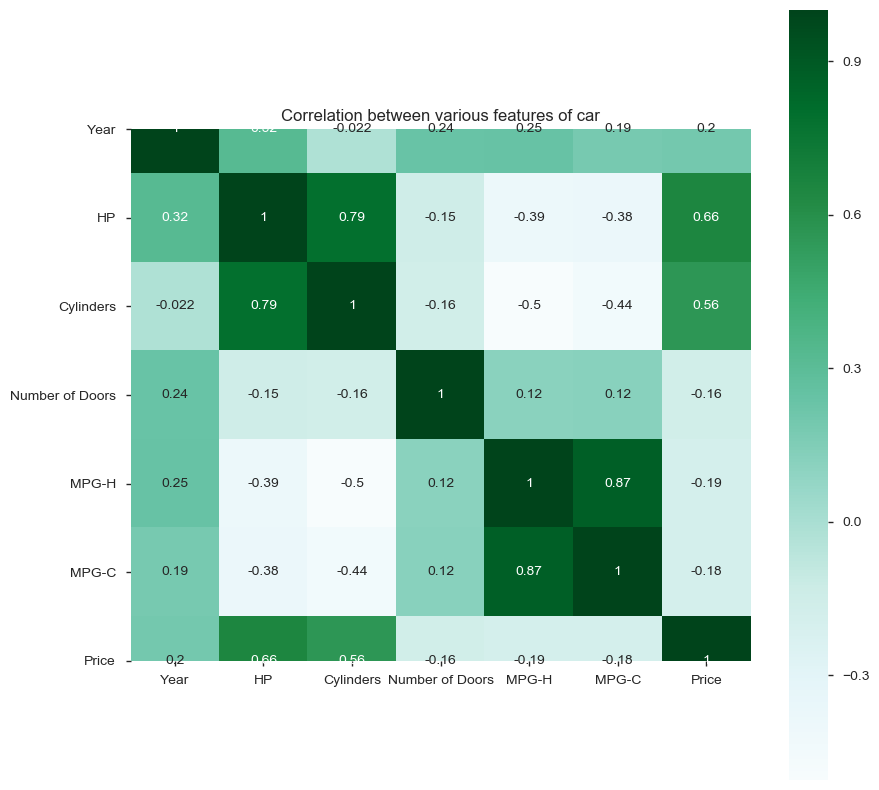

In [309]:
car_corr = cardata.corr()
car_corr
plt.figure(figsize=(10,10))
sns.heatmap(car_corr,vmax=1,square=True,annot=True, cmap='BuGn')
plt.title("Correlation between various features of car")
plt.show()